## **DSTEP20 // NOAA Sea Level Rise Revisited**
<small> January 27, 2020 </small>

This notebook will create an updated visualization to show when New Castle Battery Park will be underwater.


---

In [0]:
# -- mount google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [0]:
# -- load NOAA
fname = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
noaa = pd.read_csv(fname, skiprows=5)

# -- extract the data into separate variables
year = noaa["year"].values
slev = noaa[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]].min(axis=1).values

# -- let's make a quadratic fit/prediction
pyear = np.arange(1990, 2100)
noaa["slev"] = slev
model = sm.ols("slev ~ np.power(year, 2) + year", data=noaa)
result = model.fit()
pred = result.predict({"year":pyear})

# -- let's say NCBP is 500 mm above current value
hdiff = result.predict({"year":2020}) + 500.0

# -- solution to quadratic equation
aa   = result.params["np.power(year, 2)"]
bb   = result.params["year"]
cc   = result.params["Intercept"] - 575.
yruw = (-bb + np.sqrt(bb**2 - 4.0 * aa * cc))/ (2.0 * aa)

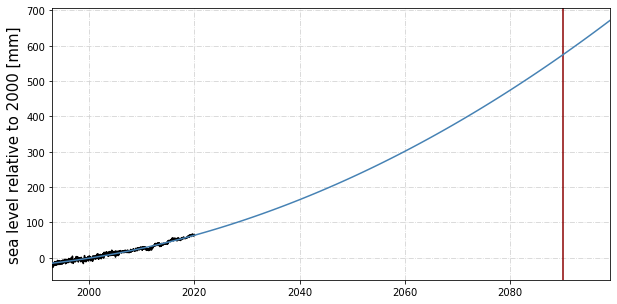

In [0]:
# -- create a figure and axis
fig, ax = plt.subplots(figsize=[10, 5], num=314)

# -- add a line to that plot
lin, = ax.plot(year, slev, color='black')

# -- add quadratic fit
qfit, = ax.plot(pyear, pred, color="steelblue")

# -- put fit in front of data
lin.set_zorder(3)
qfit.set_zorder(4)

# -- add underwater line
ax.axvline(yruw, color="darkred")

# -- add a grid
ax.grid(b = True, ls='-.', color='lightgray')

# -- add y-axis label
ax.set_ylabel('sea level relative to 2000 [mm]', fontsize=15)

# -- reset x-axis limits
ax.set_xlim(year.min(), pyear.max())

# -- save the file
fig.savefig('sea_level.png', clobber=True, dpi=500)

# -- show the figure
plt.show()

In [0]:
yruw

2090.123753505334

In [0]:
!